In [ ]:
# 하이퍼파라미터 효율적으로 탐색하기
# 하이퍼파라미터 - 각 층의 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소 등
# 이러한 하이퍼파라미터의 값을 적절히 설정하지 않으면 모델의 성능이 떨어진다.

# 신경망은 훈련을 통해 최적화하고, 시험을 통해 성능을 평가했다.
# 그러나 하이퍼파라미터의 성능을 평가할 때는 시험 데이터를 사용해서는 안된다.
'''
시험 데이터를 사용하여 파라미터를 조정하면 하이퍼파라미터 값이 시험 데이터에 오버피팅되기 때문이다.
즉, 시험 데이터를 사용해서 하이퍼파라미터 값을 '좋음'으로 만들었다면, 애초에 시험 데이터에 맞도록 하이퍼파라미터를 계속 조정한 것이므로 그 값은 시험 데이터에만 적합한 값이 되어버리는 것이다.
'''
# 따라서 하이퍼파라미터를 조정할 때는 하이퍼파라미터 전용 확인 데이터가 필요하고, 이를 일반적으로 '검증 데이터validation data'라고 부른다.
# 하이퍼파라미터의 적절성을 평가하는 데이터이다.

In [3]:
# 훈련 데이터, 검증 데이터, 시험 데이터가 모두 따로 필요하지만, MNIST 데이터에는 검증 데이터가 따로 분리되어있지 않다.
# 따라서 MNIST 데이터셋에서 훈련 데이터 중 20% 정도를 검증 데이터로 먼저 분리한다.

import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.util import *

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [ ]:
# 하이퍼파라미터 최적화의 핵심은 '최적 값'이 존재하는 범위를 조금씩 줄여나가는 데에 있다.
# 우선 대략적인 범위를 설정하고, 그 범위에서 무작위로 하이퍼파라미터 값을 골라낸(샘플링) 후, 그 값으로 정확도를 평가한다.
# 이 작업을 반복하며 하이퍼파라미터의 '최적 값' 범위를 좁혀나간다.
# 이 때, 그리드 서치grid search같은 규칙적 탐색보다는 무작위 샘플링 탐색이 더 좋은 효과를 낸다고 일반적으로 알려져 있다. 이는 최종 정확도에 미치는 영향력이 하이퍼파라미터마다 다르기 때문이다.

# 하이퍼파라미터의 범위는 '대략적으로' 지정하는 것이 효과적이다. 실제로도 10^-3~10^3정도처럼 10의 거듭제곱 꼴로 범위를 지정한다. 이를 로그 스케일log scale로 지정한다고 말한다.
# 딥러닝 학습에는 오랜 시간(예컨대 며칠이나 몇주)이 걸리므로, 나쁠 듯한 값은 일찍 포기하는 것이 좋다. 따라서 학습을 위한 에폭을 작게 하여 1회 평가에 걸리는 시간을 단축하는것이 효과적이다.

# 정리하자면
'''
- 0단계
하이퍼파라미터 값의 범위를 설정한다
- 1단계
설정된 범위에서 하이퍼파라미터 값을 무작위로 추출한다
- 2단계
1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가한다(단, 에폭은 작게 설정한다)
- 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.
'''
# 위의 방식은 실용적이나 '직관적'인 느낌을 준다. 좀 더 세련된 기법을 원한다면 베이즈 최적화Bayesian optimization를 알아볼 것.

val acc:0.11 | lr:4.380925453617544e-06, weight decay:1.2284785999519468e-06
val acc:0.17 | lr:0.00036501143841026604, weight decay:5.35322421856115e-06
val acc:0.14 | lr:0.00017863258309205407, weight decay:2.466333012532165e-05
val acc:0.08 | lr:2.0809613623465524e-06, weight decay:1.4361022431717557e-08
val acc:0.1 | lr:0.00035930711140678566, weight decay:3.45904495312087e-05
val acc:0.08 | lr:3.965835250245643e-05, weight decay:1.886117598443458e-05
val acc:0.11 | lr:4.378961507406823e-06, weight decay:1.4712785970973123e-08
val acc:0.16 | lr:0.0008252137492694825, weight decay:5.878437691064647e-07
val acc:0.13 | lr:0.000236897209715919, weight decay:2.2010645747629303e-05
val acc:0.12 | lr:3.747410006499263e-06, weight decay:2.811339283313563e-05
val acc:0.51 | lr:0.0032387615474692606, weight decay:1.75061144144685e-07
val acc:0.13 | lr:0.00013906282859197673, weight decay:1.510118624360147e-05
val acc:0.09 | lr:1.0312412315110747e-05, weight decay:7.005446159933112e-05
val acc

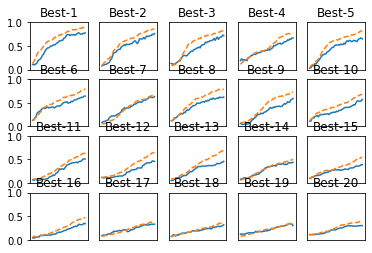

In [4]:
# 하이퍼파라미터 검증 구현

import sys, os
sys.path.append(os.pardir) 
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:500]
t_train = t_train[:500]

# 학습 데이터의 20%를 검증 데이터로 분리
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 최적화
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 하이퍼파라미터 무작위 추출 코드===============
    weight_decay = 10 ** np.random.uniform(-8, -4) # 가중치 감소 계수 범위가 10^-8부터 10^-4까지
    lr = 10 ** np.random.uniform(-6, -2) # 학습률 범위가 10^-6부터 10^-2까지
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list


print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

In [5]:
# 위의 결과에서 학습이 잘 된 사례인 Best 5까지를 살펴보면, 잘될 것 같은 값의 범위를 대략적으로 추정할 수 있다.
# lr의 경우에는 0.001~0.01 사이, 가중치 감소 계수는 10^-8~10^-6 사이라는 것을 알 수 있다.
# 이처럼 새로 추정한 (축소된) 범위들을 이용하여 똑같은 작업을 반복하고, 범위를 더 좁혀가다가 최종적으로 하나의 파라미터 값을 선택한다.

In [ ]:
# 이번 장에서 배운 내용 정리

# 매개변수 갱신 방법에는 확률적 경사 하강법(GSD) 외에도 모멘텀, AdaGrad,Adam 등이 있다.
# 가중치 초깃값을 정하는 방법은 올바른 학습을 하는 데 매우 중요하다.
# 가중치의 초깃값으로는 'Xavier 초깃값(-선형함수)'과 'He 초깃값(-ReLU함수)'이 효과적이다. 활성화 함수에 따라 적합한 초깃값이 달라진다.
# 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
# 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
# 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.